# Predicting heeart disease using ml

this notebook looks into using various Python-bases ml and data science libraries in an attempt to buil a mchine learning model capable of predicting wether or not someone has heart disease based on their medical attributes


approach:
1. Problem def
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1.Problem Definition
> Given clinical parameters about a patient predect whether a heart disease

## 3. Evaluation

> if 95% accuracy during the proof of concept ,the project will be pursued

## 4. Features
get different information about each of the features in your data.
> maybe a subject expert 

In [1]:
# create data dictionary

metadata= {'age':'age in years',
          'sex':'male=1,female=0',
           'cp':'chest pain type',
          'trestbps':'resting blooad pressure',
          'chol':'cholestoral in mg/dl',
          'fbs':'fastig blood sugar 1= true,0=false',
          'restecg':'resting electrocardiographic',
          'thalach':'maximum heart rate achieved',
          'exang':'exersice induced angina 1=yes 0=no',
          'oldpeack':'ST depression induced by exercise ST segment',
          'slope':'the slope of the peak exercise ST segment',
          'ca':'number of major vessels (0-3) colored by flourosoby',
          'thal':'3=normal 6=fixed defect 7=reversable defect',
          'target':'1 oder 0'}

## Preparing the tools

In [41]:
# import everything
# Regular EDA and plotting libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Model from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve


### Load Data

In [3]:
df = pd.read_csv('Data\heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration (EDA)
The Goal to find more about the data and become a subject matter expert on the dataset

1. What question trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do to deal with it?
4. Where are the outliers and why should care about them?
5. How can I add, change or remove features to get more out of the data

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


##### Check for target inbalance 

In [6]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

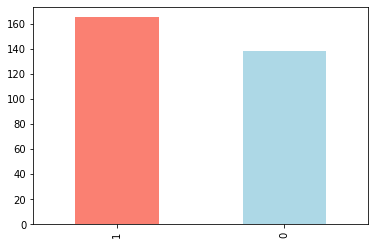

In [7]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue']);


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Freguency according to Sex

In [11]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
pd.crosstab(df.target,df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


In [13]:
# Compare target to sex
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [14]:
100*93/207,(72/96)*100

(44.927536231884055, 75.0)

In [15]:
print(f"{100*(75+45)/200}% chance to have heart-disease(to be classified as heart-disease based on the given data set)")

60.0% chance to have heart-disease(to be classified as heart-disease based on the given data set)


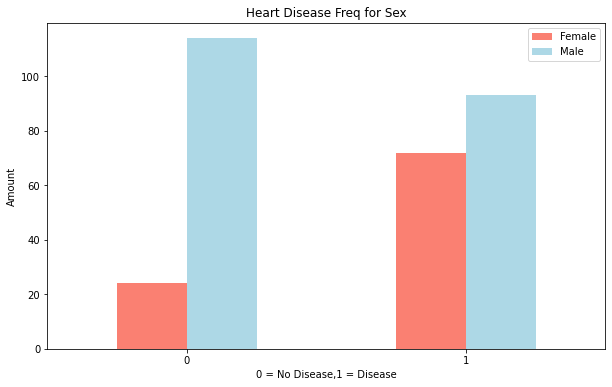

In [16]:
# plot crosstab
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['salmon','lightblue']);
plt.title("Heart Disease Freq for Sex")
plt.xlabel('0 = No Disease,1 = Disease')
plt.ylabel("Amount")
plt.legend(['Female','Male']);
plt.xticks(rotation=0);
plt.yticks(rotation=0);

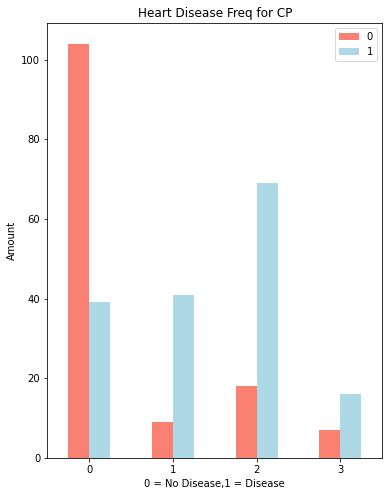

In [17]:
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                 figsize=(6,8),
                                 color=['salmon','lightblue','gold','green']);

plt.title("Heart Disease Freq for CP")
plt.xlabel('0 = No Disease,1 = Disease')
plt.ylabel("Amount")
plt.legend();
plt.xticks(rotation=0);
plt.yticks(rotation=0);

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Age vs Max Heart Rate for Heart Disease

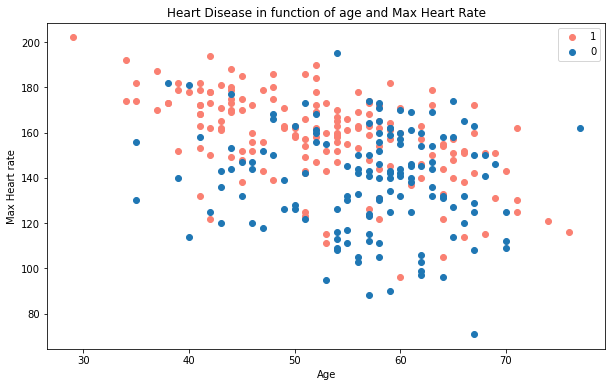

In [19]:
### create a figure
plt.figure(figsize=(10,6))

# Scatter with +ve examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon");

# Scatter with -ve examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0]);

# make plot more comm
plt.title("Heart Disease in function of age and Max Heart Rate")
plt.xlabel('Age')
plt.ylabel('Max Heart rate')
plt.legend(['1','0']);

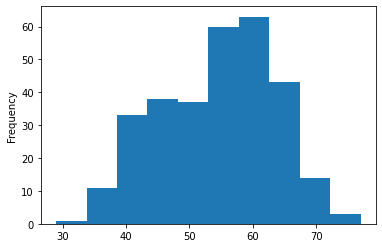

In [20]:
# Distribution of the age with a histogram
df.age.plot.hist();

In [21]:
# Correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


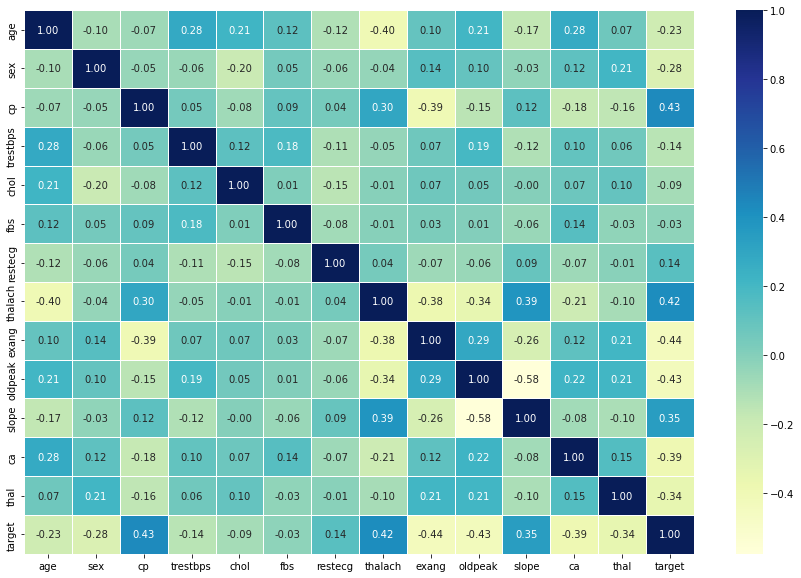

In [22]:
# Coreelation matrix more visual
corr_mat = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_mat,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap="YlGnBu");


In [23]:
metadata['exang']

'exersice induced angina 1=yes 0=no'

## 5.Modelling

In [24]:
# Split data into X and y
X = df.drop('target',axis=1)
y = df.target


In [25]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. RandomForestClassifier

In [26]:
models = {'Logistic Regression':LogisticRegression(),
         'KNN':KNeighborsClassifier(),
         'RandomForestClassifier':RandomForestClassifier()}

# Create a fun to train and avaluate
def fit_score(models,X_train, X_test, y_train, y_test):
    """
    Fits and evaluate given dictionary of models and data
    """
    np.random.seed(42)
    scores = {}
    for model_name,model in models.items():
        model.fit(X_train,y_train)
        scores[model_name] = model.score(X_test,y_test)
        
    return scores

In [27]:
scores = fit_score(models,X_train, X_test, y_train, y_test)

C:\Users\shiref\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


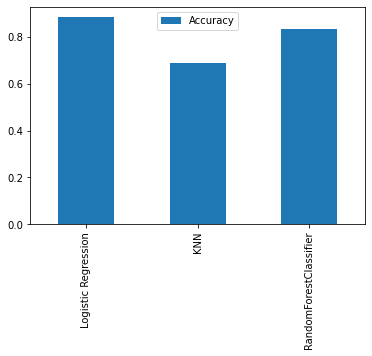

In [28]:
model_compare = pd.DataFrame(scores,index=["Accuracy"])
model_compare.T.plot.bar();

Now we got a baseline model and we know a models first prediction arenot always what we should based our next steps off.

* Hyperparameter tunung
* Feture importance
* Confusion matrix
* Cross-val
* Precision
* Recall 
* F1 score
* Classification report
* ROC curve
* AUC

### Hyperparameter tuning by hand

In [29]:
# Let's tune KNN
train_scores = []
test_scores = []

# a list of different values for n_neughbours

neighbors = range(1, 21)

# setup KNN

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    
    

Max Knn score on the test data: 75.41%


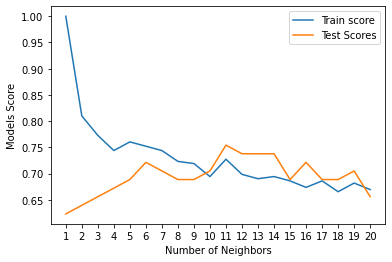

In [30]:
plt.plot(neighbors,train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test Scores")
plt.xlabel('Number of Neighbors')
plt.xticks(np.arange(1,21,1))
plt.ylabel('Models Score')
plt.legend()

print(f"Max Knn score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning `RandomizedSearchCV` 

Tune:
* LogisticRegression()
* RandomForestClassifier()

In [31]:
# Create a hyperparameter Grid for logisticRegression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
               'solver': ['liblinear']}

# Create Hyperparameter grid for RandomForestClassifier

rf_grid = {'n_estimators': np.arange(10,1000,50),
          'max_depth':[None, 3, 5,10],
          'min_samples_split': np.arange(2,20,2),
          'min_samples_leaf':np.arange(10,30,2)}

models = {"Log": LogisticRegression(),
         'RFC': RandomForestClassifier()}
# Hyperparameter grid are ready lets use them
clf = {'log_RSCV': RandomizedSearchCV(models['Log'],
                                      log_reg_grid,
                                      random_state=42,
                                      cv=5,
                                      n_iter=20,
                                     verbose=True).fit(X_train,y_train),
      'RFC_RSCV': RandomizedSearchCV(models['RFC'],
                                     rf_grid,
                                     random_state=42,
                                     cv=5,
                                     n_iter=20,
                                     verbose=True).fit(X_train,y_train)}


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


### Evaluation 

In [32]:
clf['log_RSCV'].score(X_test,y_test)

0.8852459016393442

In [33]:
clf['RFC_RSCV'].score(X_test,y_test)

0.8688524590163934

###  !!!!Something to do experiment with `RandomizedSearchCV`

## Hyperparameter tuning with gridSearchCV

will try it with gridSerachCV

In [34]:
# Different hyperParameter for our logisticregression

In [59]:
log_reg_grid = {'C' : np.logspace(-4,4, 60),
               'solver' :['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         log_reg_grid,
                         cv=5)

gs_log_reg.fit(X_train,y_train);


In [36]:
gs_log_reg.best_params_

{'C': 0.24537511066398168, 'solver': 'liblinear'}

In [37]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [38]:
print(clf['log_RSCV'].score(X_train,y_train))

0.859504132231405


## Evaluating tuned ml classifier,beyond accuracy

* ROC and AUC score
* Confusuin Matrix
* Classification report

.. it would be great if cross validation were used

In [70]:
y_preds = gs_log_reg.predict(X_test)

C:\Users\shiref\heart-disease-project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


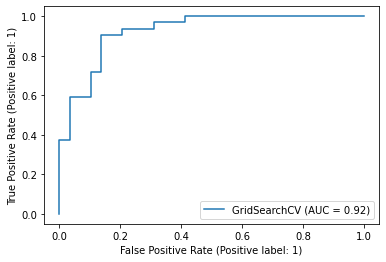

In [40]:

plot_roc_curve(gs_log_reg,X_test,y_test)

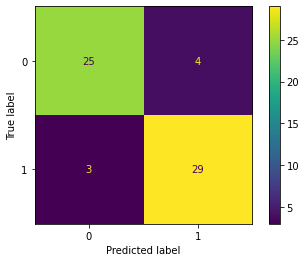

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(cm,display_labels=gs_log_reg.classes_)
disp.plot();

In [75]:
print(classification_report(y_test,y_preds))


              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Evaluation metrics using cross-validation
* Accuracy.
* Recall.
* Precision.
* f1-score.



using `cross_vak_score`


In [76]:
gs_log_reg.best_params_

{'C': 0.24537511066398168, 'solver': 'liblinear'}

In [77]:
clf = LogisticRegression(C=0.24537511066398168,
                         solver= 'liblinear')


In [92]:
def cross_val_all(clf,X,y,scoring):
    c = np.array([])
    for score in scoring :
        c = np.append(c,np.mean(cross_val_score(clf,X,y,cv=5,scoring=score)))
        
    return c

In [105]:
metrics = ['accuracy','precision','recall','f1']
res = cross_val_all(clf,X,y,metrics)

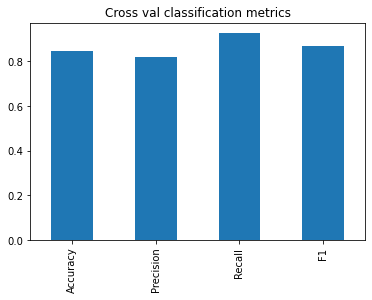

In [106]:
# Visualise cross-val metrics
cv_metrics = pd.DataFrame({'Accuracy':res[0],
                          'Precision':res[1],
                          'Recall': res[2],
                          'F1':res[3]},
                         index=[0])

cv_metrics.T.plot.bar(title='Cross val classification metrics',
                     legend=False);

### Feature Importance

Feature importance is as asking "Which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each model. One way to find feature importance is to search for "(MODEL NAME)feature importance"

Feature importance for `LogisticRegression`

In [108]:
clf = LogisticRegression(C=0.24537511066398168,
                         solver= 'liblinear')
clf.fit(X_train,y_train);

In [109]:
# coef_
clf.coef_

array([[ 0.00390076, -0.9209317 ,  0.68039158, -0.01163103, -0.00171841,
         0.05006529,  0.34309945,  0.02478829, -0.64120039, -0.5783471 ,
         0.47899753, -0.65713109, -0.70801061]])

In [110]:
# Match coefs of features to columns 
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.00390076270376665,
 'sex': -0.920931695767178,
 'cp': 0.6803915807850118,
 'trestbps': -0.011631025800132429,
 'chol': -0.0017184096885288756,
 'fbs': 0.050065285751438086,
 'restecg': 0.34309945289103694,
 'thalach': 0.024788287812652417,
 'exang': -0.6412003867245653,
 'oldpeak': -0.5783470993278784,
 'slope': 0.47899753438261666,
 'ca': -0.6571310869662398,
 'thal': -0.7080106067053217}

<AxesSubplot:title={'center':'feature Importance'}>

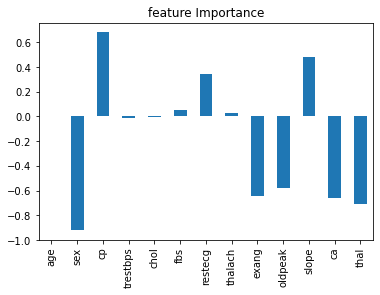

In [111]:
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title='feature Importance',legend=False)
